In [1]:
using DataFrames, CSV, Plots, StatsBase, Statistics

In [3]:
concrete_df = dropmissing(CSV.File("../../data/ConcreteUCI.csv") |> DataFrame)
strength_categories = Array(["very low", "low", "medium", "high", "very high"])
predictor_names = Array(["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age (day)"])
concrete_matrix = Matrix{Real}(concrete_df[:,predictor_names])
num_predictors = length(predictor_names)

8

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1317


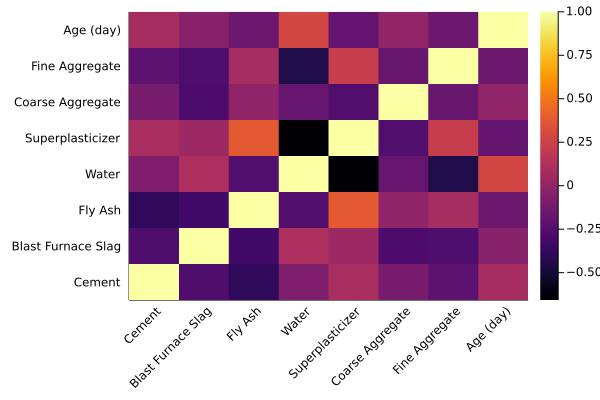

In [5]:
predictors_corr_matrix = cor(concrete_matrix, concrete_matrix)
Plots.heatmap(predictor_names, predictor_names, predictors_corr_matrix, xrotation = 45)

In [8]:
plot_matrix = Matrix{}(undef,num_predictors,num_predictors);

for i in 1:num_predictors
    for j in 1:num_predictors
        if i == j
            plot_matrix[i,j] = histogram(concrete_df[:,i])
        else
            plot_matrix[i,j] = scatter(concrete_df[:,i],concrete_df[:,j])
        end
    end    
end

f2 = plot(plot_matrix[:]..., layout=(num_predictors,num_predictors), size=(3000,3000), axis=false, ticks=false, legend=false)

savefig(f2,"../figures/matrix-corplot.pdf");